Заведем системные

In [136]:
import numpy as np
import matplotlib.pyplot as plt

In [137]:
N_GRAPH = 1000

In [138]:
def get_xs(xl, xr, n):
    if n == 1:
        return np.array([xl])
    s = (xr - xl) / (n - 1)
    return np.arange(xl, xr + 10 ** -9, s)

In [139]:
def get_diff(xs, f1, f2):
    return list(map(lambda x: abs(f1(x) - f2(x)), xs))

In [140]:
def draw(xs, ys, names=None):
    if type(xs) is not list:
        xs = [xs]
        ys = [ys]
        if names is not None:
            names = [names]
            
    n = len(xs)
    for i in range(n):
        plt.plot(xs[i], ys[i])
        
    if names is not None:
        plt.legend(names)
    plt.show()

# Упражнение 11

Дано уравнение:
$$\begin{cases} 
-\phi''(r) + l(l + 1)r^{-2} \phi(r) - 2r^{-1} \phi(r) = 2 E_{nl} \phi(r) \\ 
\phi(0) = \phi(\infty) = 0
\end{cases}$$
Перепишем:
$$\begin{cases} 
\lambda = -2 E_{nl} = -2 \frac{-1}{2(n + l + 1)^2} = \frac{1}{(n + l + 1)^2} \\
-\phi''(r) - (l(l + 1)r^{-2} \phi(r) - 2r^{-1}) \phi(r) = \lambda \phi(r) \\ 
\phi(0) = \phi(\infty) = 0
\end{cases}$$

Будем решать уравнение методом сеточной апппроксимации. Для этого научимся строить матрицу:

In [141]:
def build_matrix(R, N, d1, d2, d3):
    h = R / N
    coefs = [-2 / (i * h) for i in range(1, N)]
    A = np.zeros((N - 1, N - 1))
    for i in range(0, N - 1):
        if i != 0:
            A[i][i - 1] = d1(h, coefs[i - 1])
        A[i][i] = d2(h, coefs[i])
        if i != N - 2:
            A[i][i + 1] = d3(h, coefs[i + 1])
    return -A / 2

def get_matrix(R, N):
    return build_matrix(R, N, 
                       lambda h, c: 1 / h ** 2,
                       lambda h, c: -(2 / h ** 2 + c),
                       lambda h, c: 1 / h ** 2)

Мы хотим иметь точность $\epsilon = 10^{-5}$.

Знаем, что скорость сходимости сеточной аппроксимации $O(h^2) = O((\frac{R}{N})^2)$.

Следовательно $N > R 10^{\frac{5}{2}} = 3162$.

Однако эта ассимптотическая оценка скрывает в себе константу, и в действительности желаемая точность при таких $R$ и $N$ не достигается. Поэтому возьмем большие значения: $R=100$ и $N = 5000$ и найдем для них спектр матрицы.

Сначала найдем первые $5$ собственных чисел:

In [168]:
R = 100
N = 5000
A = get_matrix(R, N)
ls, vs = np.linalg.eig(A)
inds = np.argsort(ls)

print("First 5 eigenvalues:")
print(ls[inds][:5])

First 5 eigenvalues:
[-0.49995001 -0.12499688 -0.05555494 -0.0312498  -0.01999989]


И теперь построим функции:

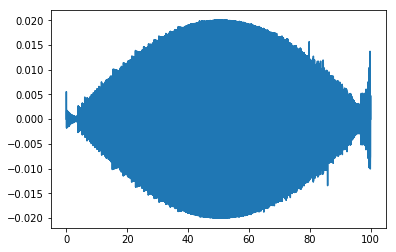

In [169]:
num = 0
v = vs[inds][num]

xs = get_xs(0, R, N + 1)
ys = [0] + v.tolist() + [0]

draw(xs, ys)

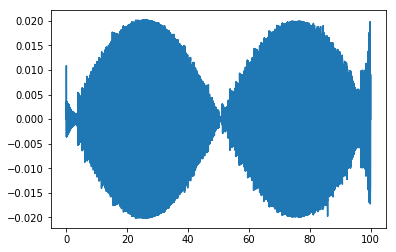

In [170]:
num = 1
v = vs[inds][num]

xs = get_xs(0, R, N + 1)
ys = [0] + v.tolist() + [0]

draw(xs, ys)

In [171]:
num = 2
v = vs[inds][num]

xs = get_xs(0, R, N + 1)
ys = [0] + v.tolist() + [0]

draw(xs, ys)

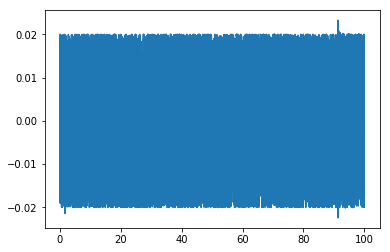

In [172]:
num = 3
v = vs[inds][num]

xs = get_xs(0, R, N + 1)
ys = [0] + v.tolist() + [0]

draw(xs, ys)

In [173]:
num = 4
v = vs[inds][num]

xs = get_xs(0, R, N + 1)
ys = [0] + v.tolist() + [0]

draw(xs, ys)

Теперь реализуем метод Нумерова. Сначала построим матрицу:

In [148]:
def get_matrix_numerov(R, N):
    A = build_matrix(R, N,
                     lambda h, c: 1 / h ** 4 - 1 / 12 * c / h ** 2,
                     lambda h, c: - (2 / h ** 4 + c - 1 / 6 * c / h ** 2),
                     lambda h, c: 1 / h ** 4 - 1 / 12 * c / h ** 2)
    
    
    B = build_matrix(R, N,
                     lambda h, c: 1 / h ** 2 / 12,
                     lambda h, c: 1 - 1 / (6 * h ** 2),
                     lambda h, c: 1 / h ** 2 / 12)
    
    return -np.matmul(np.linalg.inv(B), A) / 2

Для дальнейшего сравнения точности нам понадобятся правильные ответы, вычисленные аналитически:

In [149]:
def get_real_eigenvalues(n):
    return [-1 / (2 * (n + 1) ** 2) for n in range(5)]

Научимся считать максимальную ошибку метода (среди первых $5$ собственных чисел) для конкретных $R$ и $N$:

In [150]:
def get_max_error(getter, R, N):
    A = getter(R, N)
    c = np.sort(np.linalg.eig(A)[0])[:5]
    r = get_real_eigenvalues(N)
    return max(abs(c - r))

Построим несколько графиков для различных $R$ в зависимости от $N$:

In [151]:
R = 100
N_min = 6
N_max = 200

Ns = range(N_min, N_max + 1)

err1 = list(map(lambda n: get_max_error(get_matrix, R, n), Ns))
err2 = list(map(lambda n: get_max_error(get_matrix_numerov, R, n), Ns))

Ns = [Ns] * 2
err = [err1, err2]
names = ["Сеточная аппроксимация (R = " + str(R) + ")", 
         "Нумеров (R = " + str(R) + ")"]

err = np.array(err)
err = np.log(err)

draw(Ns, err, names)

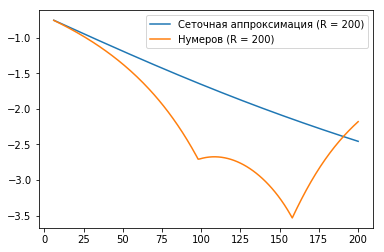

In [152]:
R = 200
N_min = 6
N_max = 200

Ns = range(N_min, N_max + 1)

err1 = list(map(lambda n: get_max_error(get_matrix, R, n), Ns))
err2 = list(map(lambda n: get_max_error(get_matrix_numerov, R, n), Ns))

Ns = [Ns] * 2
err = [err1, err2]
names = ["Сеточная аппроксимация (R = " + str(R) + ")", 
         "Нумеров (R = " + str(R) + ")"]

err = np.array(err)
err = np.log(err)

draw(Ns, err, names)

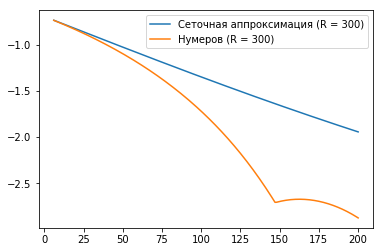

In [153]:
R = 300
N_min = 6
N_max = 200

Ns = range(N_min, N_max + 1)

err1 = list(map(lambda n: get_max_error(get_matrix, R, n), Ns))
err2 = list(map(lambda n: get_max_error(get_matrix_numerov, R, n), Ns))

Ns = [Ns] * 2
err = [err1, err2]
names = ["Сеточная аппроксимация (R = " + str(R) + ")", 
         "Нумеров (R = " + str(R) + ")"]

err = np.array(err)
err = np.log(err)

draw(Ns, err, names)

Ну и заодно построим графики для различных $N$  в зависимости от $R$:

In [ ]:
R_min = 10
R_max = 1000
N = 10

Rs = range(R_min, R_max + 1)

err1 = list(map(lambda r: get_max_error(get_matrix, r, N), Rs))
err2 = list(map(lambda r: get_max_error(get_matrix_numerov, r, N), Rs))

Rs = [Rs] * 2
err = [err1, err2]
names = ["Сеточная аппроксимация (N = " + str(N) + ")",
         "Нумеров (N = " + str(N) + ")"]

err = np.array(err)
err = np.log(err)

draw(Rs, err, names)

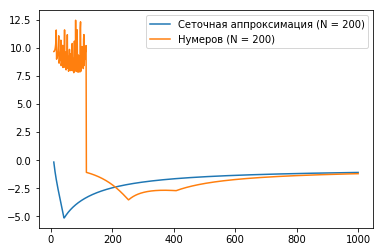

In [159]:
R_min = 10
R_max = 1000
N = 200

Rs = range(R_min, R_max + 1)

err1 = list(map(lambda r: get_max_error(get_matrix, r, N), Rs))
err2 = list(map(lambda r: get_max_error(get_matrix_numerov, r, N), Rs))

Rs = [Rs] * 2
err = [err1, err2]
names = ["Сеточная аппроксимация (N = " + str(N) + ")",
         "Нумеров (N = " + str(N) + ")"]

err = np.array(err)
err = np.log(err)

draw(Rs, err, names)

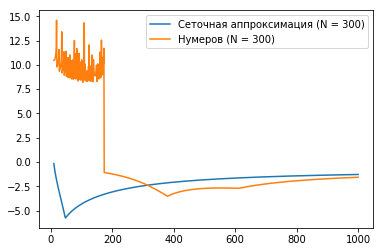

In [160]:
R_min = 10
R_max = 1000
N = 300

Rs = range(R_min, R_max + 1)

err1 = list(map(lambda r: get_max_error(get_matrix, r, N), Rs))
err2 = list(map(lambda r: get_max_error(get_matrix_numerov, r, N), Rs))

Rs = [Rs] * 2
err = [err1, err2]
names = ["Сеточная аппроксимация (N = " + str(N) + ")",
         "Нумеров (N = " + str(N) + ")"]

err = np.array(err)
err = np.log(err)

draw(Rs, err, names)

Из графиков видно следуюущее:

1) Ошибка метода сеточной аппроксимации убывает экспоненциально от $N$.

2) Нумеров выглядит лучше сеточной аппроксимации. Но он может резко выдавать большие ошибки. Я полагаю, что это связано с накапливанием ошибки при вычислениях в Нумерове. Это происходит при слишком маленьких $R$ и слишком большх $N$.

3) Для каждого фиксированного $N$ у обоих методов есть оптимальное $R$ (оно возрастает от $N$), для которого ошибка будет минимальна. И в то же время ошибка будет тем больше, чем дальше значение $R$ от оптимального.

Ну и давайте найдем эти оптимальные значения $R$ в зависимости от $N$:

In [184]:
def get_min_r(getter, Ns, r):
    rs = [r]
    for n in Ns[1:]:
        br = rs[-1]
        berr = get_max_error(getter, br, n)
        while True:
            cr = br + 1
            err = get_max_error(getter, cr, n)
            if berr > err:
                br = cr
                berr = err
            else:
                break
                
        rs.append(br)
        
    return rs
            

In [ ]:
N_min = 100
N_max = 1000

Ns = list(range(N_min, N_max + 1))

rs1 = get_min_r(get_matrix, Ns, 10)
rs2 = get_min_r(get_matrix_numerov, Ns, 100)

Ns = [Ns] * 2
rs = [rs1, rs2]
names = ["Сеточная аппроксимация", 
         "Нумеров"]

draw(Ns, rs, names)

На самое начало не стоит обращать внимание (это нужно, чтобы быстро построить графики).

Видно, что у обоих методов значения оптимальных $R$ линейно возрастают. Но у Нумерова сильно быстрее.